In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [43]:
import pandas as pd

# Charger les données depuis le fichier CSV
file_path = r'C:\\Users\\marti\\Desktop\\Nouveau dossier\\ML-DL_Fiance\\BTC_USD_yahoofinace\\bitcoin_data.csv'
data = pd.read_csv(file_path)  # Spécification du chemin du fichier CSV

# Vérification des premières lignes après la conversion
print(data.head())


        Price         Adj Close             Close              High  \
0      Ticker           BTC-USD           BTC-USD           BTC-USD   
1        Date               NaN               NaN               NaN   
2  2020-01-01  7200.17431640625  7200.17431640625  7254.33056640625   
3  2020-01-02  6985.47021484375  6985.47021484375   7212.1552734375   
4  2020-01-03  7344.88427734375  7344.88427734375  7413.71533203125   

                Low              Open       Volume  
0           BTC-USD           BTC-USD      BTC-USD  
1               NaN               NaN          NaN  
2   7174.9443359375  7194.89208984375  18565664997  
3  6935.27001953125  7202.55126953125  20802083465  
4     6914.99609375   6984.4287109375  28111481032  


In [44]:
# Renommer les colonnes
data.columns = ['date', 'adj_close', 'close', 'high', 'low', 'open', 'volume']

# Supprimer les lignes contenant 'ticker' ou 'BTC-USD' dans toutes les colonnes
data = data[~data.apply(lambda row: row.astype(str).str.contains('ticker|BTC-USD', case=False).any(), axis=1)]

# Supprimer les lignes contenant des NaN
data = data.dropna()

# Afficher les premières lignes après les modifications
print(data.head())

         date         adj_close             close              high  \
2  2020-01-01  7200.17431640625  7200.17431640625  7254.33056640625   
3  2020-01-02  6985.47021484375  6985.47021484375   7212.1552734375   
4  2020-01-03  7344.88427734375  7344.88427734375  7413.71533203125   
5  2020-01-04  7410.65673828125  7410.65673828125   7427.3857421875   
6  2020-01-05   7411.3173828125   7411.3173828125   7544.4970703125   

                low              open       volume  
2   7174.9443359375  7194.89208984375  18565664997  
3  6935.27001953125  7202.55126953125  20802083465  
4     6914.99609375   6984.4287109375  28111481032  
5  7309.51416015625  7345.37548828125  18444271275  
6  7400.53564453125  7410.45166015625  19725074095  


In [45]:
# Enregistrer le DataFrame nettoyé dans un nouveau fichier CSV
data.to_csv('bitcoin_data_c.csv', index=False)


In [46]:
import pandas as pd

# Charger le fichier CSV nettoyé
file_path = 'bitcoin_data_c.csv'
data = pd.read_csv(file_path)


# Convertir la colonne 'date' en format datetime
data['date'] = pd.to_datetime(data['date'])

# Afficher les premières lignes pour vérifier
print(data.head())

        date    adj_close        close         high          low         open  \
0 2020-01-01  7200.174316  7200.174316  7254.330566  7174.944336  7194.892090   
1 2020-01-02  6985.470215  6985.470215  7212.155273  6935.270020  7202.551270   
2 2020-01-03  7344.884277  7344.884277  7413.715332  6914.996094  6984.428711   
3 2020-01-04  7410.656738  7410.656738  7427.385742  7309.514160  7345.375488   
4 2020-01-05  7411.317383  7411.317383  7544.497070  7400.535645  7410.451660   

        volume  
0  18565664997  
1  20802083465  
2  28111481032  
3  18444271275  
4  19725074095  


In [47]:

# Vérifier les valeurs manquantes dans chaque colonne
missing_values = data.isnull().sum()

# Afficher le nombre de valeurs manquantes par colonne
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 date         0
adj_close    0
close        0
high         0
low          0
open         0
volume       0
dtype: int64


In [48]:
# Supprimer les lignes contenant des valeurs manquantes
data_cleaned = data.dropna()

# Vérifier si les valeurs manquantes ont été supprimées
missing_values_cleaned = data_cleaned.isnull().sum()

print("Valeurs manquantes après nettoyage :\n", missing_values_cleaned)


Valeurs manquantes après nettoyage :
 date         0
adj_close    0
close        0
high         0
low          0
open         0
volume       0
dtype: int64


In [49]:
# Afficher les premières lignes de la base de données nettoyée
print("Premières lignes après suppression des valeurs manquantes :\n", data_cleaned.head())


Premières lignes après suppression des valeurs manquantes :
         date    adj_close        close         high          low         open  \
0 2020-01-01  7200.174316  7200.174316  7254.330566  7174.944336  7194.892090   
1 2020-01-02  6985.470215  6985.470215  7212.155273  6935.270020  7202.551270   
2 2020-01-03  7344.884277  7344.884277  7413.715332  6914.996094  6984.428711   
3 2020-01-04  7410.656738  7410.656738  7427.385742  7309.514160  7345.375488   
4 2020-01-05  7411.317383  7411.317383  7544.497070  7400.535645  7410.451660   

        volume  
0  18565664997  
1  20802083465  
2  28111481032  
3  18444271275  
4  19725074095  


<Figure size 1200x800 with 0 Axes>

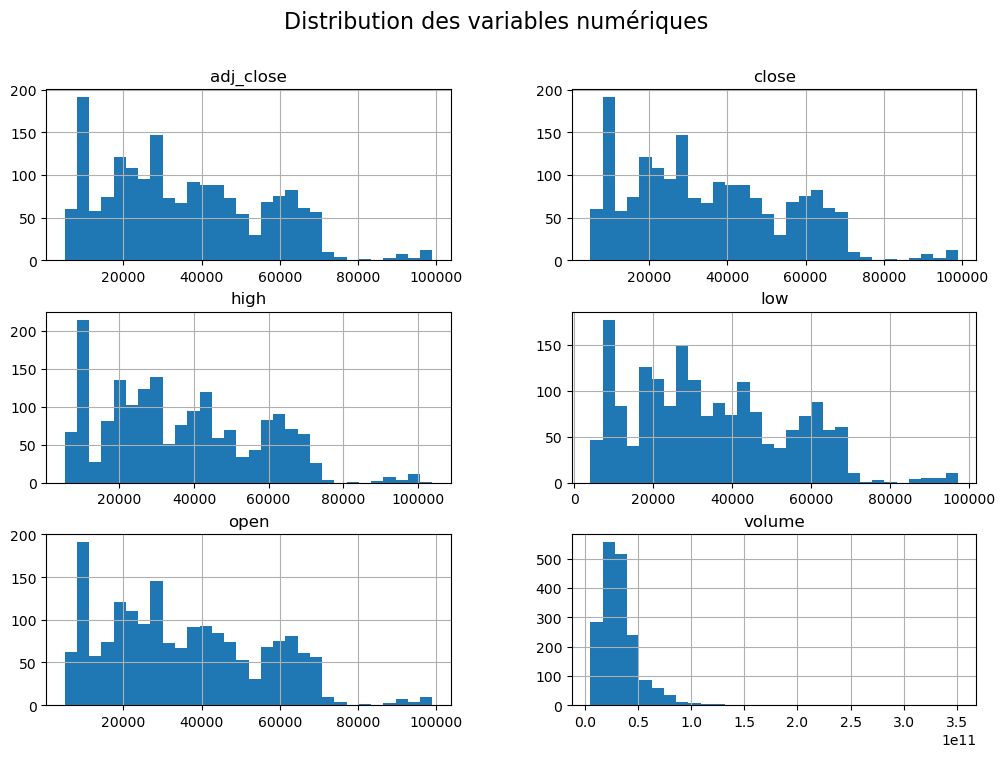

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher la distribution des variables numériques
plt.figure(figsize=(12, 8))

# Histogrammes pour chaque colonne numérique
data[['adj_close', 'close', 'high', 'low', 'open', 'volume']].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.show()


<Figure size 1200x800 with 0 Axes>

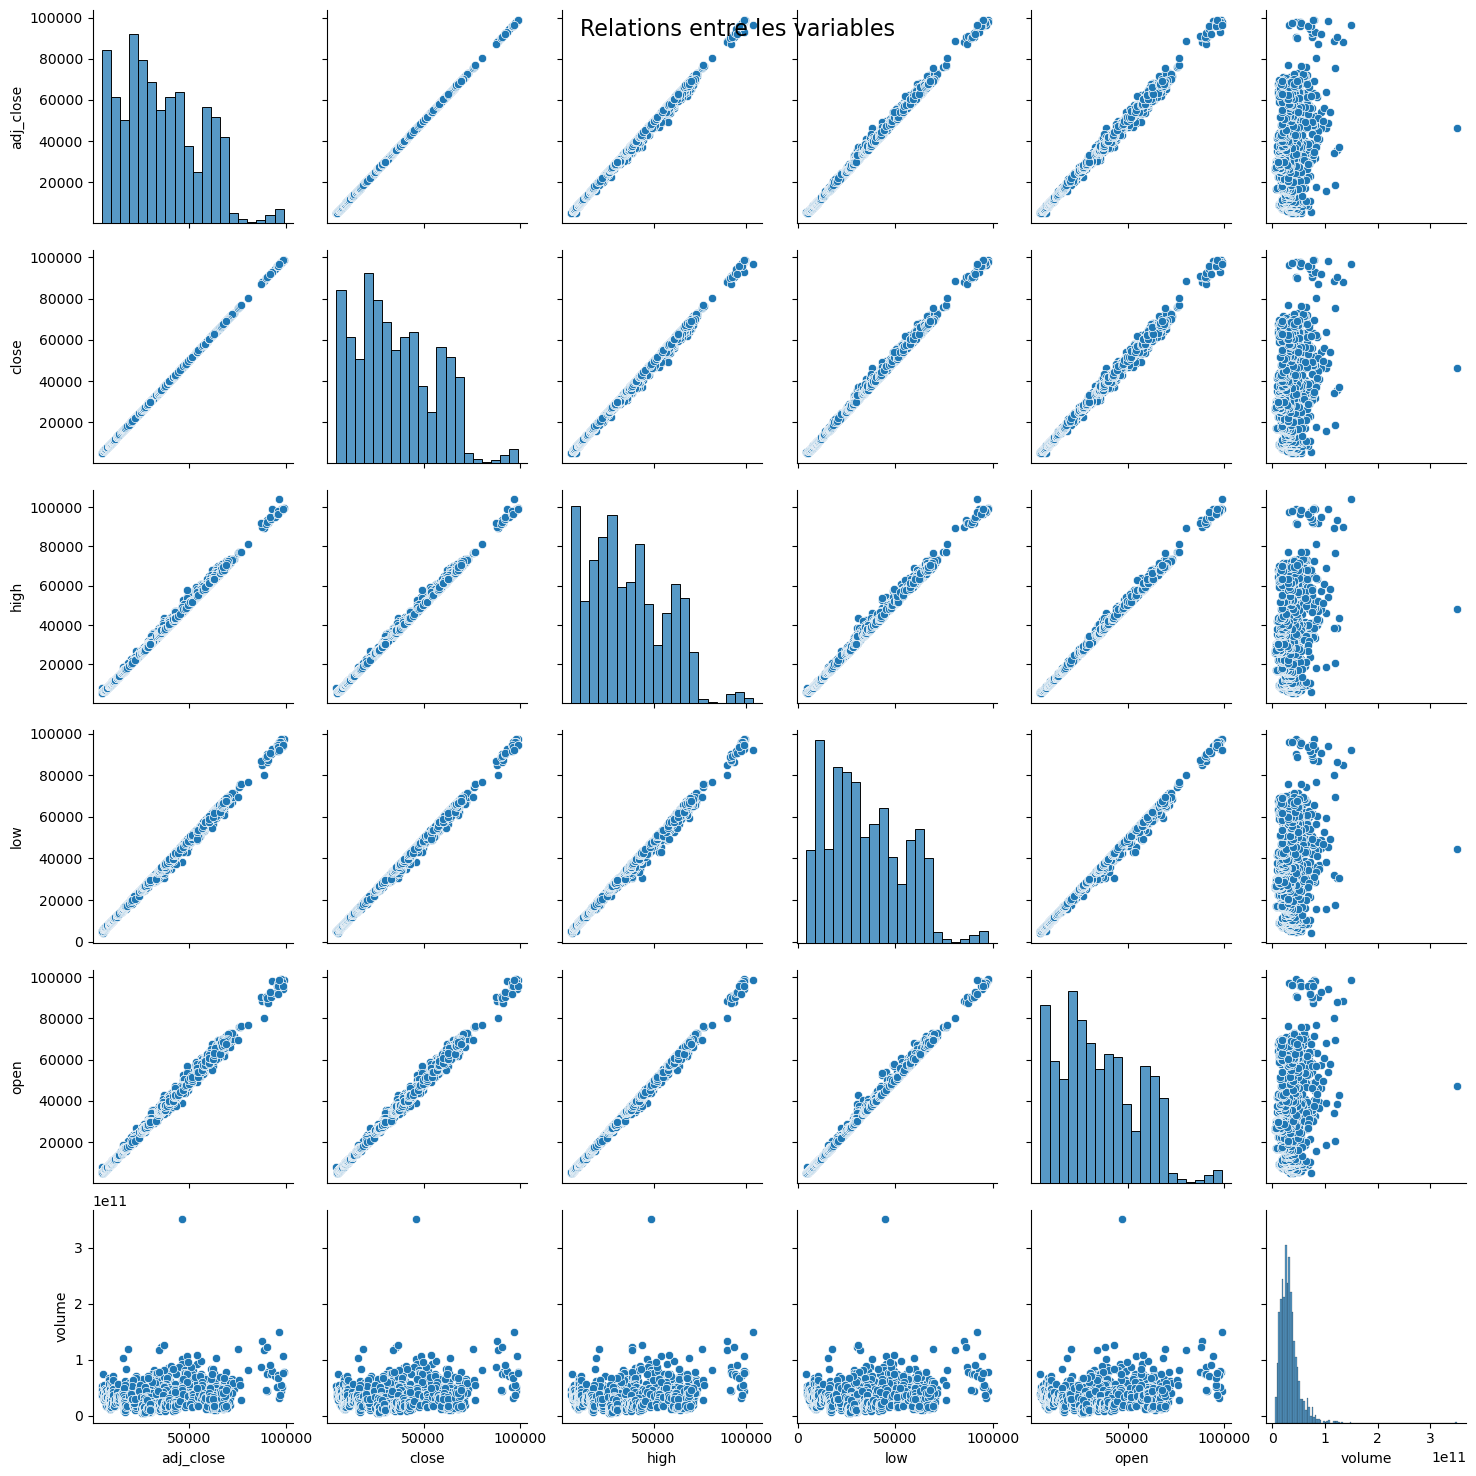

In [51]:
# Visualiser les relations entre les variables et la variable cible 'high'
plt.figure(figsize=(12, 8))

# Visualiser les relations avec pairplot (diagrams de dispersion)
sns.pairplot(data[['adj_close', 'close', 'high', 'low', 'open', 'volume']])
plt.suptitle("Relations entre les variables", fontsize=16)
plt.show()


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sélectionner les variables indépendantes (features) et la cible (high)
X = data[['adj_close', 'close', 'low', 'open', 'volume']]  # Features
y = data['high']  # Target variable

# Diviser les données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données (très important pour certains modèles)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Affichage de la forme des ensembles d'entraînement et de test
print(f"Ensemble d'entraînement : {X_train_scaled.shape}")
print(f"Ensemble de test : {X_test_scaled.shape}")


Ensemble d'entraînement : (1440, 5)
Ensemble de test : (361, 5)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import joblib  # Pour enregistrer le modèle

# Initialiser les modèles
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Dictionnaire pour stocker les résultats
results = {}

# Entraîner et évaluer chaque modèle
for model_name, model in models.items():
    print(f"Entraînement de {model_name}...")
    # Entraîner le modèle
    model.fit(X_train_scaled, y_train)
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test_scaled)
    
    # Calculer MSE et R2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Stocker les résultats
    results[model_name] = {'MSE': mse, 'R2': r2}
    
    # Afficher les résultats de l'évaluation
    print(f"{model_name} - MSE: {mse:.4f}, R2: {r2:.4f}\n")

# Afficher tous les résultats
print("Comparaison des modèles :")
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.4f}, R2: {metrics['R2']:.4f}")


Entraînement de Linear Regression...
Linear Regression - MSE: 201533.4684, R2: 0.9995

Entraînement de Random Forest...
Random Forest - MSE: 246307.8709, R2: 0.9994

Entraînement de XGBoost...
XGBoost - MSE: 304195.8224, R2: 0.9993

Comparaison des modèles :
Linear Regression - MSE: 201533.4684, R2: 0.9995
Random Forest - MSE: 246307.8709, R2: 0.9994
XGBoost - MSE: 304195.8224, R2: 0.9993


In [58]:
# Sélectionner le meilleur modèle (le modèle avec le plus haut R²)
best_model_name = max(results, key=lambda model: results[model]['R2'])
best_model = models[best_model_name]

# Enregistrer le meilleur modèle
joblib.dump(best_model, 'bitcoin_model.pkl')

print(f"Le meilleur modèle est {best_model_name}. Modèle enregistré sous 'bitcoin_model.pkl'.")


Le meilleur modèle est Linear Regression. Modèle enregistré sous 'bitcoin_model.pkl'.


In [59]:
# Charger le modèle enregistré
best_model_loaded = joblib.load('best_model.pkl')

# Effectuer des prédictions avec le modèle chargé
y_pred_loaded = best_model_loaded.predict(X_test_scaled)

# Afficher quelques prédictions
print(f"Quelques prédictions du modèle chargé : {y_pred_loaded[:5]}")


Quelques prédictions du modèle chargé : [20297.55286133 64011.26172517 39525.05558665  9816.57556313
 30774.27646544]
